In [1]:
import numpy as np
import matplotlib.pyplot as plt


from copy import deepcopy

import gamspec

In [51]:
# 用于寻峰的分支
sav = gamspec.SavitzkySmoother(3, 3)
convol = gamspec.SecondConvolutionPeakSearcher()
fpeak = gamspec.Flow(gamspec.Pipe([sav, convol]), 0, 0, 1, 1)

# 用于平滑的分支
wavelet = gamspec.TranslationInvarianceWaveletSmoother('dmey', 'quadratic-soft', order=3)
fsmooth = gamspec.Flow(wavelet, 0, 0, 1, 0) 

# 两个分支合并
def combine(spec1, spec2):
    spec1.regions = deepcopy(spec2.regions)
    return spec1
comb = gamspec.Combinor(2, func=combine)
fcomb = gamspec.Flow(comb, 1, [0, 1], 2, 0)

# 剥谱
strp = gamspec.OtherOperator.AdaptiveSNIPStripper(baseline=False)
fstrip = gamspec.Flow(strp, 2, 0, 3, 0)

# 拟合，计算峰面积
fit = gamspec.RegionPeakFitter(10, equal_width=False, baseline=False)
ffit = gamspec.Flow(fit, 3, 0, 4, 0)

pipenet = gamspec.PipeNet([fpeak, fsmooth, fcomb, fstrip, ffit])

使用numpy产生随机数然后绘制直方图得到的高斯分布单峰。无本底。预设峰位置50，标准差1.3

In [52]:
# np.random.seed(1)

# signal = np.random.normal(loc=50, scale=1.3, size=1000)
# histo = np.histogram(signal, bins=100, range=(0,100))[0]
# spec = gamspec.Spectrum(histo)

# pipenet([spec])
# pipenet.get_node(4)[0].export_to_excel('test.xlsx')

使用numpy产生随机数然后绘制直方图得到的高斯分布单峰。无本底。预设峰位置50，标准差1.3，固定添加高度为100的本底后再进行正态扰动											

In [53]:
np.random.seed(1)

signal = np.random.normal(loc=50, scale=4, size=1000)
histo = np.histogram(signal, bins=100, range=(0,100))[0]
histo = histo + 100
print(histo.max()-100)
histo = np.random.normal(loc=histo, scale=histo**0.5)
spec = gamspec.Spectrum(histo)


114


In [54]:
pipenet([spec])
pipenet.get_node(4)[0].export_to_pandas()

GAMUT: Start running PipeNet
|Execute: Node 0|[0] >> Pipe >> Node 1|[1]
|Execute: Node 0|[0] >> WaveletSmoother[O10MqTv] >> Node 1|[0]
|Execute: Node 1|[0, 1] >> Combinor >> Node 2|[0]
|Execute: Node 2|[0] >> AdaptiveSNIPStripper >> Node 3|[0]
|Execute: Node 3|[0] >> RegionPeakFitter >> Node 4|[0]
Fitting Region: 0~17, NPeaks=1, time=Wed Jan 17 11:52:21 2024
Finish Fitting Region: time=Wed Jan 17 11:52:21 2024
Fitting Region: 39~68, NPeaks=1, time=Wed Jan 17 11:52:21 2024


d:\Conda\envs\gamut\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  warnings.warn(


Finish Fitting Region: time=Wed Jan 17 11:52:21 2024
Fitting Region: 70~99, NPeaks=1, time=Wed Jan 17 11:52:21 2024
Finish Fitting Region: time=Wed Jan 17 11:52:21 2024


,left,right,energy,location,height,stderr,area,err_area,fitness
0,0,17,12,12,4.303154,3.775578,40.724921,111.455487,0.996525
1,39,68,50,50,81.512868,4.573303,934.428589,65.835441,0.990927
2,70,99,72,72,2.830139,2.119945,15.039110,6.319422,0.364215


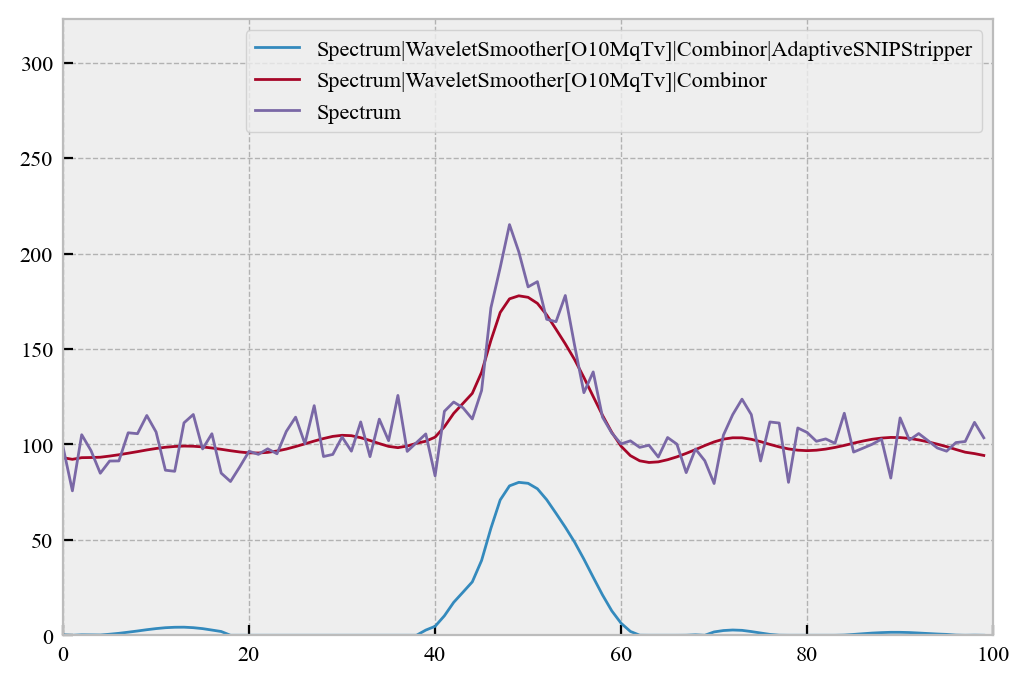

In [55]:
pipenet.get_node(3)[0].plot()
pipenet.get_node(1)[0].plot()
pipenet.get_node(0)[0].plot()
plt.legend()